<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/imbalanced-dataset/01-data-sampling/02_oversampling_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Oversampling Methods

In [6]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

from numpy import mean
from numpy import where
from matplotlib import pyplot


In [2]:
def get_x_y():
  X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
  return X, y

##SMOTE for Balancing Data

Counter({0: 9900, 1: 100})


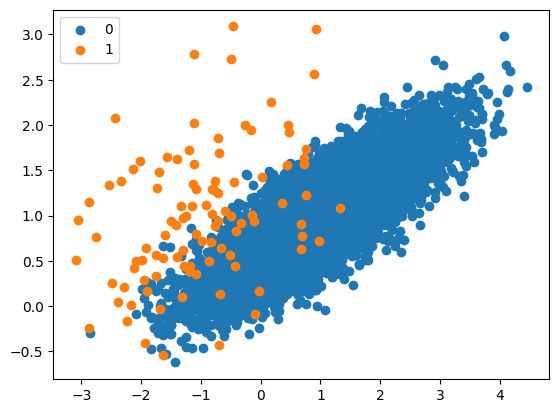

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 9900})


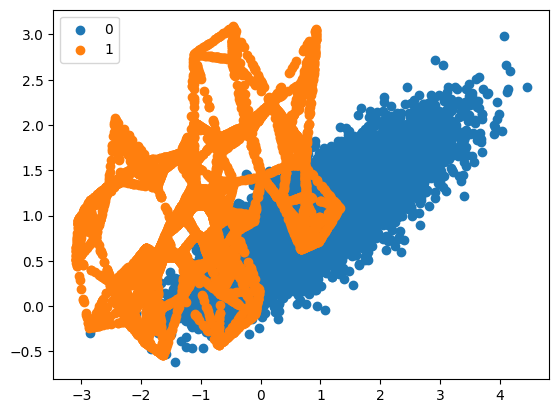

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##SMOTE for Classification

In [ ]:
# define dataset
X, y = get_x_y()
# summarize class distribution
print(f"Imbalanced dataset: {Counter(y)}")

# define model
model = DecisionTreeClassifier()

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Mean ROC AUC: %.3f' % score)

Imbalanced dataset: Counter({0: 9900, 1: 100})
Mean ROC AUC: 0.762


In [ ]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling

# define dataset
X, y = get_x_y()

# define pipeline
steps = [("over", SMOTE()), ("model", DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Mean ROC AUC: %.3f' % score)

Mean ROC AUC: 0.824


In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification

# define dataset
X, y = get_x_y()

# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in k_values:
  # define pipeline
  model = DecisionTreeClassifier()
  oversample = SMOTE(sampling_strategy=0.1, k_neighbors=k)
  steps = [("over", oversample), ("model", DecisionTreeClassifier())]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
  score = mean(scores)
  print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.783
> k=2, Mean ROC AUC: 0.798
> k=3, Mean ROC AUC: 0.812
> k=4, Mean ROC AUC: 0.811
> k=5, Mean ROC AUC: 0.811
> k=6, Mean ROC AUC: 0.804
> k=7, Mean ROC AUC: 0.822
> k=8, Mean ROC AUC: 0.826
> k=9, Mean ROC AUC: 0.828
> k=10, Mean ROC AUC: 0.821


##Selective Sample Generation

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


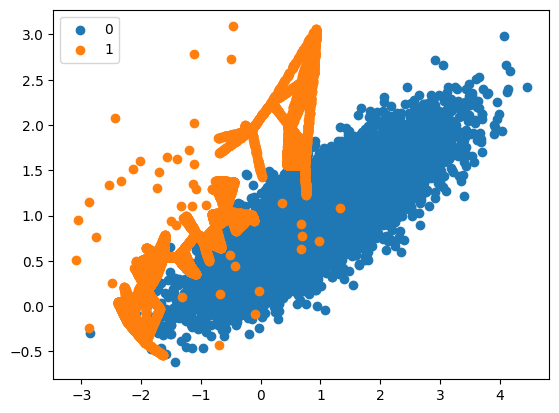

In [3]:
# borderline-SMOTE for imbalanced dataset

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Borderline-SMOTE SVM

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


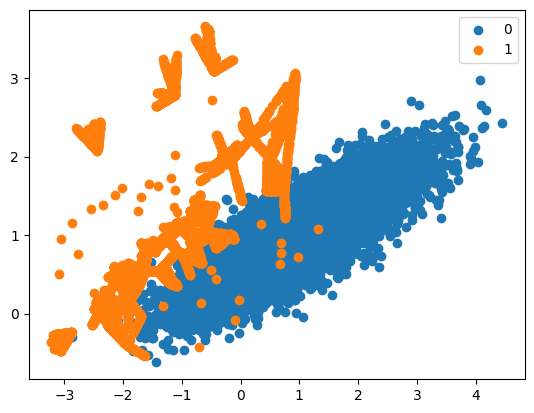

In [5]:
# borderline-SMOTE with SVM for imbalanced dataset

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Adaptive Synthetic Sampling

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


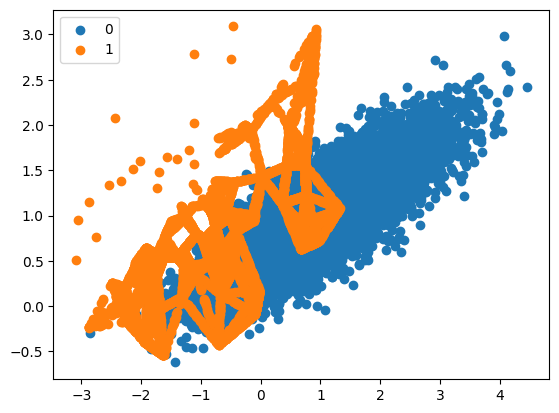

In [7]:
# Oversample and plot imbalanced dataset with ADASYN

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()